# **Australia Wildfire Dashboard**

## **1. Introduction**

In this project, we build an interactive dashboard to visualize wildfire data in Australia. The dashboard allows users to explore trends in wildfires by region and year, showing both the estimated fire area and the number of pixels affected by presumed vegetation fires. We utilize the Dash framework, along with Plotly and Pandas, to create a web-based application that enables dynamic visualizations.

### **Purpose of the Dashboard:**

The main goal of this dashboard is to provide an easy-to-use interface to explore the historical wildfire data. By selecting different regions and years, users can gain insights into:
- How the estimated fire area varies across different months.
- How the frequency of vegetation fires changes over time.

## **2. Dataset Overview**

This project uses the **Historical Wildfires** dataset, which contains wildfire data for Australia. Key columns include:
- `Region`: The region where the wildfire occurred (e.g., New South Wales, Queensland).
- `Date`: The date of the wildfire event.
- `Estimated_fire_area`: The estimated area burned by the fire (in hectares).
- `Count`: The count of pixels affected by presumed vegetation fires.

### **Link to Dataset:**
The dataset can be accessed from [this link](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv).


## **3. Technologies Used**

This project leverages the following technologies:

- **Dash**: A Python framework for building interactive web applications. We use Dash to create the app layout, handle user inputs, and display visualizations.
- **Plotly**: A data visualization library that is integrated with Dash for creating interactive plots. We use Plotly to generate pie and bar charts.
- **Pandas**: A data manipulation library to process the wildfire data. Pandas is used for cleaning and transforming the data before visualizing it.

## **4. Code Implementation**

Below is the Python code for the entire Dash app. It is structured into different sections: importing libraries, data preprocessing, layout creation, and callbacks.

### **4.1. Importing Libraries**

Here, we import the necessary libraries:
- `pandas` for data manipulation.
- `dash`, `dcc`, `html`, and `dash.dependencies` for building the Dash app and creating interactivity.
- `plotly.graph_objects` and `plotly.express` for creating plots.
- `datetime` to handle date-related operations.

In [2]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt

### **4.2. Data Preprocessing**
In this section, we read the CSV file into a Pandas DataFrame and preprocess the date column by extracting the `Month` and `Year`.

In [3]:
# Read the wildfire data into pandas dataframe
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')

# Extract year and month from the date column
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()  # Used for the names of the months
df['Year'] = pd.to_datetime(df['Date']).dt.year

### **4.3. Dash Layout**
The layout defines the structure of the dashboard. It includes dropdowns for selecting the region and year, and placeholders for displaying the graphs.

In [4]:
# Create app
app = dash.Dash(__name__)

# Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

# Layout Section of Dash
app.layout = html.Div(children=[
    html.H1('Australia Wildfire Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 26}),
    
    # Outer division for radio and dropdown selections
    html.Div([
        html.Div([html.H2('Select Region:', style={'margin-right': '2em'})]),
        dcc.RadioItems([{"label":"New South Wales","value": "NSW"},
                        {"label":"Northern Territory","value": "NT"},
                        {"label":"Queensland","value": "QL"},
                        {"label":"South Australia","value": "SA"},
                        {"label":"Tasmania","value": "TA"},
                        {"label":"Victoria","value": "VI"},
                        {"label":"Western Australia","value": "WA"}],"NSW", id='region',inline=True),
        
        # Dropdown to select year
        html.Div([html.H2('Select Year:', style={'margin-right': '2em'}),
                  dcc.Dropdown(df.Year.unique(), value = 2005, id='year')
        ]),
        
        # Divisions for the two output graphs
        html.Div([
            html.Div([], id='plot1'),
            html.Div([], id='plot2')
        ], style={'display': 'flex'}),
    ])
])

### **4.4. Callbacks and Interactivity**
The callback function listens to user inputs (region and year) and updates the plots accordingly.

In [5]:
@app.callback(
    [Output(component_id='plot1', component_property='children'),
     Output(component_id='plot2', component_property='children')],
    [Input(component_id='region', component_property='value'),
     Input(component_id='year', component_property='value')])
def reg_year_display(input_region, input_year):
    region_data = df[df['Region'] == input_region]
    y_r_data = region_data[region_data['Year'] == input_year]
    
    # Plot one: Monthly Average Estimated Fire Area
    est_data = y_r_data.groupby('Month')['Estimated_fire_area'].mean().reset_index()
    fig1 = px.pie(est_data, values='Estimated_fire_area', names='Month', title=f"{input_region} : Monthly Average Estimated Fire Area in year {input_year}")
    
    # Plot two: Monthly Average Count of Pixels for Presumed Vegetation Fires
    veg_data = y_r_data.groupby('Month')['Count'].mean().reset_index()
    fig2 = px.bar(veg_data, x='Month', y='Count', title=f"{input_region} : Average Count of Pixels for Presumed Vegetation Fires in year {input_year}")
    
    return [dcc.Graph(figure=fig1), dcc.Graph(figure=fig2)]

## **5. Installation Instructions**

Before running the project, ensure that you have all the necessary dependencies installed. You can install them directly from the Jupyter notebook using the following commands:

### **5.1. Install Dependencies**

You can install the required libraries, `Dash`, `Plotly`, and `Pandas`, using the following commands in the notebook:

```python
%pip install dash plotly pandas
```

Alternatively, you can install these libraries through the terminal or command prompt if you're not using a notebook environment:

```bash
pip install dash plotly pandas
```

## **6. How to Run the Project**

Once you have installed the dependencies, you can run the Dash app locally. Follow these steps:

1. **Save the Python Code**: download the dash_wildfire.py.
2. **Run the App**: Run the app using the following command in your terminal or command prompt:

```bash
python dash_wildfire.py
```

3. **Access the Dashboard**: After running the app, it will start a local server. Open a web browser and visit the URL `http://127.0.0.1:8050/` to view the interactive dashboard.

4. **Interact with the Dashboard**: You can select different regions and years using the dropdowns, and the graphs will update accordingly to show the corresponding data for the selected region and year.

## **7. Screenshot of the Dashboard**

Once you've successfully run the app, you may see the following interactive dashboard. The dashboard displays wildfire data for different regions of Australia and allows users to explore trends in fire areas and vegetation fires over time.

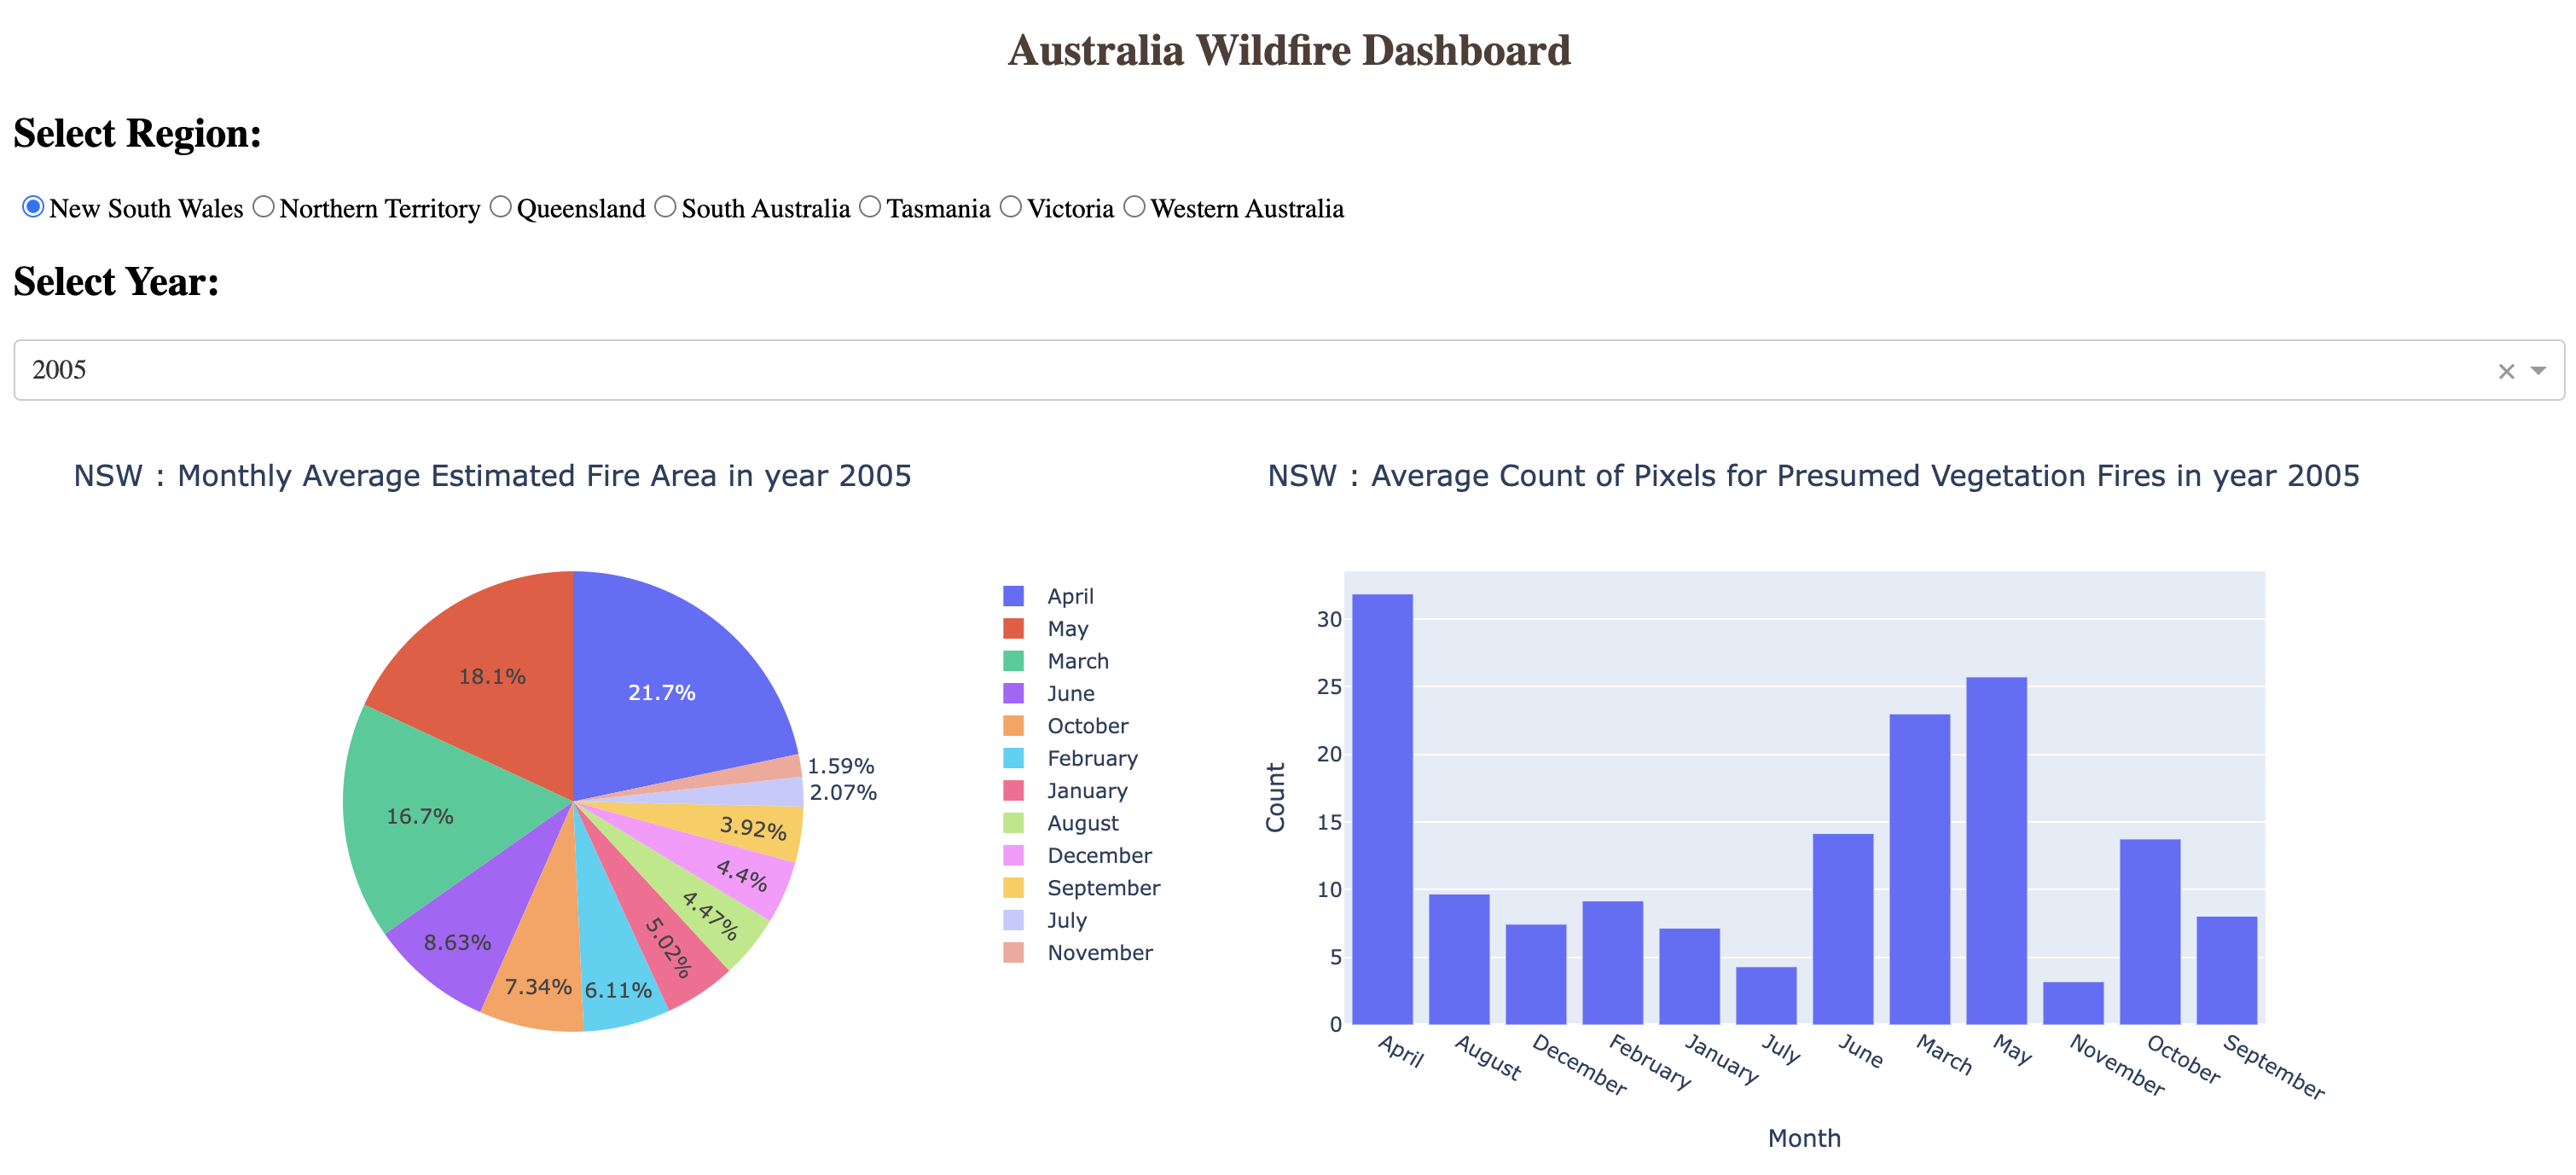


## **8. Conclusion**

In this project, we created an interactive dashboard that visualizes Australian wildfire data. Users can interact with the dashboard by selecting regions and years to explore the estimated fire areas and vegetation fire trends. The use of Dash for interactivity and Plotly for visualizations allows for a dynamic exploration of the dataset.

## **8. Acknowledgements**

This project was completed as part of the **IBM Data Science Professional Certificate** on Coursera. I would like to express my gratitude to the instructors and the Coursera platform for providing the resources and guidance to help me develop my skills in data science, including working with interactive dashboards and visualizations.

The knowledge gained from the **Data Visualization** course enabled me to design this interactive dashboard, allowing users to explore wildfire data across Australia and visualize trends over time.

### **Course Details:**
- **Course Name**: Data Visualization
- **Institution**: IBM on Coursera
- **Course Link**: [Python for Data Visualization](https://www.coursera.org/learn/python-for-data-visualization?specialization=applied-data-science)
